# Bagian 2 : Modeling
Selamat datang pada bagian 2, atau bagian akhir dari proyek ini. Pada notebook ini saya akan membuat perkiraan kasus covid 19 untuk periode 6 bulan ke depan (sampai bulan juli) dengan menggunakan model ARIMA. terdapat beberapa penjelasan terkait model ini :

- ARIMA --> yakni metode prediksi, dengan memanfaatkan data2 periode sebelumnya untuk memprediksi yang akan datang
- ACF --> yakni untuk mengukur korelasi antara time series dengan lag-nya 
- PACF --> yakni untuk mengukur korelasi antara time series dengan lag-nya secara parsial

 Label di Hyperparameternya :
- p --> menyatakan berapa banyak data dari observasi sebelumnya yang akan digunakan ke dalam forecasting dan mewakili autoregressive
- d --> menyatakan ordo differencing yang kita perlukan dan merepresentasikan bagian integrated
- q --> nilai yang digunakan untuk mengontrol autokorelasi residual dalam pemodelan serta mewakili moving average 

### Importing Library

In [1]:
# Untuk Mengolah Data 
import pandas as pd
import numpy as np

# Untuk Visualisasi 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Untuk Forecasting / prediksi 
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### Importing Dataset

In [2]:
df = pd.read_csv('covid19_2022.csv')
pd.set_option('display.max_column',df.shape[0]+1)
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,year
0,AFG,Asia,Afghanistan,2021-01-01,52513.0,183.0,131.143,2201.0,12.0,9.429,1318.249,4.594,3.292,55.252,0.301,0.237,0.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.04,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,2021
1,AFG,Asia,Afghanistan,2021-01-02,52586.0,73.0,117.429,2211.0,10.0,9.000,1320.081,1.833,2.948,55.503,0.251,0.226,0.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.04,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,2021
2,AFG,Asia,Afghanistan,2021-01-03,52709.0,123.0,123.000,2221.0,10.0,9.000,1323.169,3.088,3.088,55.754,0.251,0.226,0.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.04,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,2021
3,AFG,Asia,Afghanistan,2021-01-04,52909.0,200.0,128.857,2230.0,9.0,8.571,1328.190,5.021,3.235,55.980,0.226,0.215,0.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.04,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,2021
4,AFG,Asia,Afghanistan,2021-01-05,53011.0,102.0,123.429,2237.0,7.0,7.857,1330.750,2.561,3.098,56.156,0.176,0.197,0.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.04,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91110,ZWE,Africa,Zimbabwe,2022-01-24,228541.0,287.0,297.286,5305.0,11.0,6.714,15143.017,19.016,19.698,351.507,0.729,0.445,0.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4913.0,1829333.0,121.211,0.326,4043.0,0.268,0.0735,13.6,tests performed,7517985.0,4245063.0,3272922.0,NaN,5082.0,10273.0,49.81,28.13,21.69,NaN,681.0,5009.0,0.033,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN,2022
91111,ZWE,Africa,Zimbabwe,2022-01-25,228776.0,235.0,330.857,5316.0,11.0,8.286,15158.588,15

In [3]:
df_idn = df[df['location'] == 'Indonesia']

### EDA

In [4]:
df_idn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 37955 to 38347
Data columns (total 68 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    393 non-null    object 
 1   continent                                   393 non-null    object 
 2   location                                    393 non-null    object 
 3   date                                        393 non-null    object 
 4   total_cases                                 393 non-null    float64
 5   new_cases                                   393 non-null    float64
 6   new_cases_smoothed                          393 non-null    float64
 7   total_deaths                                393 non-null    float64
 8   new_deaths                                  393 non-null    float64
 9   new_deaths_smoothed                         393 non-null    float64
 10  total_ca

In [5]:
# Melihat Pergerakan Data 
fig = go.Figure([go.Scatter(name ='True', x = df_idn['date'], y = df_idn['new_cases_smoothed'])])
fig.show()

Pergerakan data terlihat relatif cukup stationer

### ACT - PACF

Tahap ini merupakan tahap menentukan hyperparameter yang optimal, sehingga kita dapat memilih kandidat model mana yang paling tepat pada dataset ini

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning:

invalid value encountered in sqrt



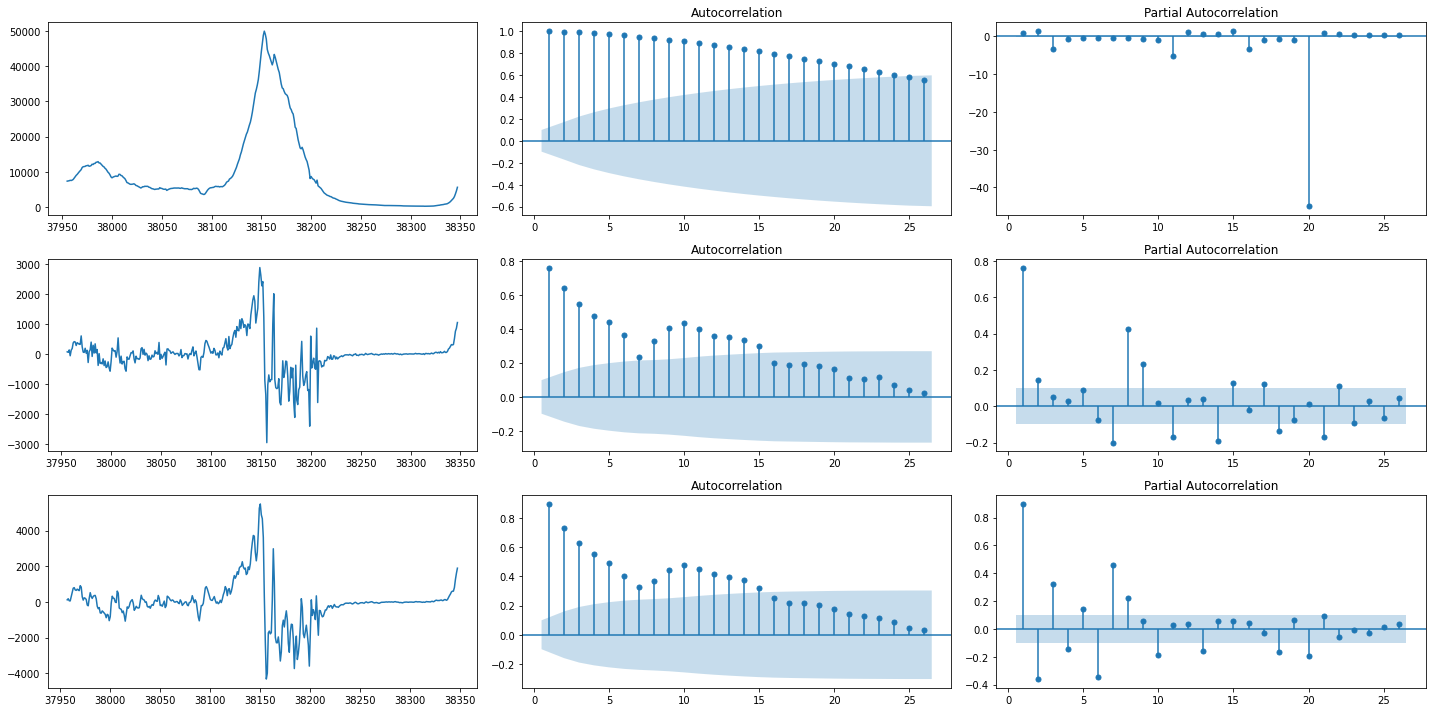

In [6]:
fig, axes = plt.subplots(3,3, figsize=(20,10))

# visualisasi data asli
axes[0,0].plot(df_idn['new_cases_smoothed'])
plot_acf(df_idn['new_cases_smoothed'], zero= False, ax= axes[0,1])
plot_pacf(df_idn['new_cases_smoothed'], zero= False, ax= axes[0,2])

# visualisasi data diff pertama
axes[1,0].plot(df_idn['new_cases_smoothed'].diff())
plot_acf(df_idn['new_cases_smoothed'].diff().dropna(), zero= False, ax= axes[1,1])
plot_pacf(df_idn['new_cases_smoothed'].diff().dropna(), zero= False, ax= axes[1,2])

# visualisasi data diff kedua
axes[2,0].plot(df_idn['new_cases_smoothed'].diff(2))
plot_acf(df_idn['new_cases_smoothed'].diff(2).dropna(), zero= False, ax= axes[2,1])
plot_pacf(df_idn['new_cases_smoothed'].diff(2).dropna(), zero= False, ax= axes[2,2])

plt.tight_layout()

plt.show()

Berdasarkan hasil di atas, pada ordo 0, plot acf menunjukkan pergerakan data yang tidak stationer, karena plot acf terus menurun perlahan, sehingga menggunakan diferencing hingga ordo 2 dan hasilnya cukup stationer. Pada plot di atas, cut off terjadi hanya pada plot pacf saja, sedangkan acf hanya memperlihatkan pola tails off, karena kita memakai data 1 periode sebelumnya dan plot pacf terlihat cut off pada leg 2 dan ordo 2, maka kandidat modelnya adalah ARIMA (1,2,2) dan ARIMA (1,2,1).

Catatan :
- Tails Off --> Leg menunjukkan penurunan secara perlahan
- Cut Off --> Leg menujukkan penurunan secara drastis

### Modeling

In [7]:
model_1 = ARIMA(df_idn['new_cases_smoothed'], order = (1,2,2))   
model_fit = model_1.fit()

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g

In [8]:
# Evaluasi Model
print(model_fit.summary())

                               ARIMA Model Results                               
Dep. Variable:     D2.new_cases_smoothed   No. Observations:                  391
Model:                    ARIMA(1, 2, 2)   Log Likelihood               -2894.651
Method:                          css-mle   S.D. of innovations            396.887
Date:                   Tue, 01 Feb 2022   AIC                           5799.301
Time:                           21:32:55   BIC                           5819.145
Sample:                                2   HQIC                          5807.167
                                                                                 
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.9832      5.520      0.178      0.859      -9.837      11.803
ar.L1.D2.new_cases_smoothed     0.6708      0.110      6

In [7]:
model_2 = ARIMA(df_idn['new_cases_smoothed'], order = (1,2,1))   
model_fit = model_2.fit()

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g

In [8]:
# Evaluasi Model
print(model_fit.summary())

                               ARIMA Model Results                               
Dep. Variable:     D2.new_cases_smoothed   No. Observations:                  391
Model:                    ARIMA(1, 2, 1)   Log Likelihood               -2895.377
Method:                          css-mle   S.D. of innovations            397.628
Date:                   Tue, 01 Feb 2022   AIC                           5798.754
Time:                           21:55:47   BIC                           5814.629
Sample:                                2   HQIC                          5805.046
                                                                                 
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           1.0697      5.905      0.181      0.856     -10.504      12.643
ar.L1.D2.new_cases_smoothed     0.5565      0.069      8

Berdasarkan performa model di atas, nilai AIC terendah adalah model ARIMA (1,2,1), walaupun perbedaan sangat tipis, tetapi sebaiknya kita pilih nilai AIC terendah, sehingga model terbaik adalah **ARIMA (1,2,1)**

### Forecasting

In [9]:
forecast_lenght = 6 # Menetukan periode prediksi 
forecast_result = model_fit.forecast(forecast_lenght)

In [10]:
forecast_result

(array([6390.35457533, 7101.29936051, 7746.82877659, 8356.4318764 ,
        8946.51801438, 9526.21827096]),
 array([ 397.62796667,  779.01276072, 1169.58479396, 1562.49164127,
        1956.89417833, 2353.90602042]),
 array([[ 5611.01808141,  7169.69106925],
        [ 5574.46240601,  8628.13631501],
        [ 5454.48470355, 10039.17284962],
        [ 5294.00453337, 11418.85921942],
        [ 5111.07590329, 12781.96012547],
        [ 4912.64724794, 14139.78929397]]))

In [11]:
# Hasil prediksinya 
print('Hasil Prediksi Kasus Covid 6 Bulan ke Depan = \n', forecast_result[0])

Hasil Prediksi Kasus Covid 6 Bulan ke Depan = 
 [6390.35457533 7101.29936051 7746.82877659 8356.4318764  8946.51801438
 9526.21827096]


In [12]:
# Standar error, seberapa menyimpang prediksinya
print('Standar Error Hasil Prediksi = \n', forecast_result[1])

Standar Error Hasil Prediksi = 
 [ 397.62796667  779.01276072 1169.58479396 1562.49164127 1956.89417833
 2353.90602042]


In [13]:
# Selang kepercayaannya, meleset dalam angkanya
print('Standar Error Hasil Prediksi = \n', forecast_result[2])

Standar Error Hasil Prediksi = 
 [[ 5611.01808141  7169.69106925]
 [ 5574.46240601  8628.13631501]
 [ 5454.48470355 10039.17284962]
 [ 5294.00453337 11418.85921942]
 [ 5111.07590329 12781.96012547]
 [ 4912.64724794 14139.78929397]]


In [14]:
# Membuat Hasil Prediksi ke dalam Dataframe Baru
date = []
for i in range(2, 7+1):
    date.append('2022 -'+str(i)+'- 15')

In [15]:
date

['2022 -2- 15',
 '2022 -3- 15',
 '2022 -4- 15',
 '2022 -5- 15',
 '2022 -6- 15',
 '2022 -7- 15']

In [16]:
df_forecast = pd.DataFrame({
    'date': date,
    'new_cases_smoothed': forecast_result[0]
})

df_forecast

,date,new_cases_smoothed
0,2022 -2- 15,6390.354575
1,2022 -3- 15,7101.299361
2,2022 -4- 15,7746.828777
3,2022 -5- 15,8356.431876
4,2022 -6- 15,8946.518014
5,2022 -7- 15,9526.218271


In [17]:
df_forecast['date'] = pd.to_datetime(df_forecast['date'])

In [18]:
df_forecast

,date,new_cases_smoothed
0,2022-02-15,6390.354575
1,2022-03-15,7101.299361
2,2022-04-15,7746.828777
3,2022-05-15,8356.431876
4,2022-06-15,8946.518014
5,2022-07-15,9526.218271


In [19]:
# Menggabungkan Visualisasinya
df_forecast_2 = df_idn[-1:].append(df_forecast)

In [20]:
df_forecast_2

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,year
38347,IDN,Asia,Indonesia,2022-01-28,4319175.0,9905.0,5561.000000,144268.0,7.0,9.571,15628.698,35.841,20.122,522.026,0.025,0.035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258145.0,47876593.0,173.239,0.934,207101.0,0.749,NaN,NaN,people tested,310841558.0,183677032.0,NaN,NaN,1368059.0,1093233.0,112.48,66.46,NaN,NaN,3956.0,522197.0,0.189,NaN,276361788.0,145.725,29.3,5.319,3.053,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718,NaN,NaN,NaN,NaN,2022.0
0,NaN,NaN,NaN,2022-02-15 00:00:00,NaN,NaN,6390.354575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,2022-03-15 00:00:00,NaN,NaN,7101.299361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,2022-04-15 00:00:00,NaN,NaN,7746.828777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,2022-05-15 00:00:00,NaN,NaN,8356.431876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,2022-06-15 00:00:00,NaN,NaN,8946.518014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,2022-07-15 00:00:00,NaN,NaN,9526.218271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df_forecast_3 = pd.DataFrame({
    'date': df_forecast['date'],
    'new_cases_smoothed': forecast_result[0],
    'standar_error':forecast_result[1],
    'lower_bound' :forecast_result[2][:,0],
    'upper_bound' :forecast_result[2][:,1]
})

df_forecast_3

,date,new_cases_smoothed,standar_error,lower_bound,upper_bound
0,2022-02-15,6390.354575,397.627967,5611.018081,7169.691069
1,2022-03-15,7101.299361,779.012761,5574.462406,8628.136315
2,2022-04-15,7746.828777,1169.584794,5454.484704,10039.172850
3,2022-05-15,8356.431876,1562.491641,5294.004533,11418.859219
4,2022-06-15,8946.518014,1956.894178,5111.075903,12781.960125
5,2022-07-15,9526.218271,2353.906020,4912.647248,14139.789294


In [23]:
# Melihat hasil forecastingnya
fig = go.Figure([go.Scatter(name ='Data Sebelumnya', x = df_idn['date'], y = df_idn['new_cases'])])
fig.add_traces([go.Scatter(name ='Prediksi', x = df_forecast_2['date'], y = df_forecast_2['new_cases_smoothed'])])
fig.add_traces([go.Scatter(name ='Batas Bawah', x = df_forecast_3['date'], y = df_forecast_3['lower_bound'])])
fig.add_traces([go.Scatter(name ='Batas Atas', x = df_forecast_3['date'], y = df_forecast_3['upper_bound'])])

fig.update_xaxes(rangeslider_visible = True)
fig.show()

**Keterangan :**
- Data Sebelumnya --> Data asli atau yang terjadi sebelumnya (Sampai periode 28 Januari 2022)
- Prediksi --> data hasil prediksi atau forecasting (Sampai periode July 2022)
- Batas Atas --> data atau nilai maksimal prediksinya akan meleset
- Batas Bawah --> data atau nilai minimal prediksinya akan meleset 